In [1]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling
from gensim.models.callbacks import CallbackAny2Vec
import matplotlib.pyplot as plt
import random
import gensim
import pickle
import sys
import datetime

In [2]:
loss_list=[]

In [3]:
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 1

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_list.append(loss)
        print('Loss after epoch {}: {}'.format(self.epoch, loss))
        self.epoch += 1
        
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings
    try:
        with open("tsne_model.pkl", 'rb')as f:
            vectors = pickle.load(f)
    except:
        vectors = np.asarray(model.wv.vectors)
        # reduce using t-SNE
        tsne = TSNE(n_components=num_dimensions, random_state=0)
        vectors = tsne.fit_transform(vectors)
        pickle.dump(vectors, open("tsne_model.pkl", "wb"))

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [4]:
model_file_path = '../data/corpus_word2vec.sav'
model = gensim.models.Word2Vec.load(model_file_path)
x_vals, y_vals, labels = reduce_dimensions(model)
ec_vectors = {i:[] for i in range(1, 7)}
#ec_labels = []
cluster_vectors = []

In [5]:
for n, i in enumerate(labels):
    if "EC" in i:
        ec_vectors[int(i[3])].append([x_vals[n], y_vals[n]])
        #ec_labels.append(labels[i])
    elif "Clu" in i:
        cluster_vectors.append([x_vals[n], y_vals[n]])
        #cluster_labels.append(labels[i])
for i in range(1, 7):
    ec_vectors[i] = np.array(ec_vectors[i])
cluster_vectors = np.array(cluster_vectors)

c:\Users\laiqi\anaconda3\envs\word2vec\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


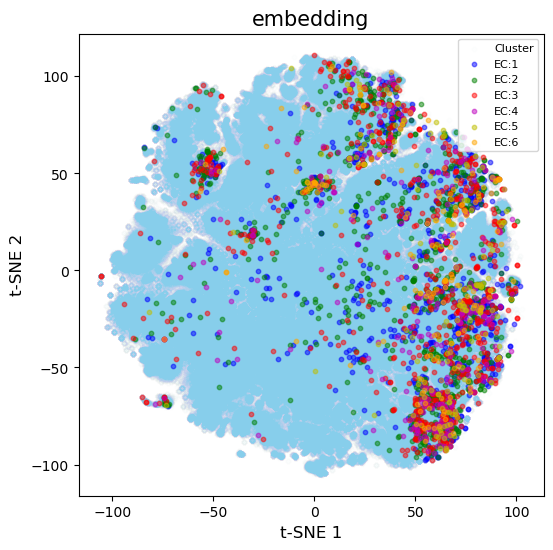

In [14]:
ec_colors = ['b', 'g', 'r', 'm', 'y', 'orange']
cluster_color = "c"
plt.figure(figsize=(6, 6))
plt.scatter(cluster_vectors[:, 0], cluster_vectors[:, 1], c='skyblue', label='Cluster', s=10 , alpha=0.01)
for i in range(1, 7):
    plt.scatter(ec_vectors[i][:, 0], ec_vectors[i][:, 1], c=ec_colors[i-1], label='EC:'+str(i), s=10, alpha=0.5)
# 添加图例
plt.legend(fontsize=8)
plt.xlabel('t-SNE 1', fontsize=12)
plt.ylabel('t-SNE 2', fontsize=12)
plt.title('embedding', fontsize=15)
plt.show()

In [34]:
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #正常显示负号

In [10]:
np.array((2,68,88))/255

array([0.00784314, 0.26666667, 0.34509804])

In [11]:
color_map_suzume_1 = [np.array((17,50,93))/255,
                      np.array((54,80,131))/255,
                      np.array((115,107,157))/255,
                      np.array((183,131,175))/255,
                      np.array((245,166,115))/255,
                      np.array((252,219,114))/255] 

C:\Users\laiqi\AppData\Local\Temp\ipykernel_21908\2183402475.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(ec_vectors[i][:, 0], ec_vectors[i][:, 1], c=color_map_suzume_1[i-1], label='EC:'+str(i), s=10, alpha=0.5)
C:\Users\laiqi\AppData\Local\Temp\ipykernel_21908\2183402475.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('./embedding_tsne.svg',format='svg')
C:\Users\laiqi\AppData\Local\Temp\ipykernel_21908\2183402475.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('./embedding_tsne.png',format='png', dpi=600)
c:\Users\laiqi\anaconda3\envs\word2vec\lib\site-packages\IPython\c

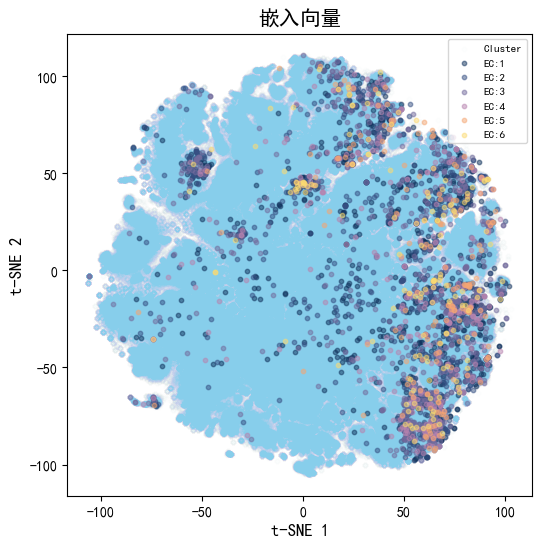

In [35]:
plt.figure(figsize=(6, 6))
plt.scatter(cluster_vectors[:, 0], cluster_vectors[:, 1], c='skyblue', label='Cluster', s=10 , alpha=0.01)
plt.legend(fontsize=8)
for i in range(1, 7):
    plt.scatter(ec_vectors[i][:, 0], ec_vectors[i][:, 1], c=color_map_suzume_1[i-1], label='EC:'+str(i), s=10, alpha=0.5)
# 添加图例
plt.legend(fontsize=8)
plt.xlabel('t-SNE 1', fontsize=12)
plt.ylabel('t-SNE 2', fontsize=12)
plt.title('嵌入向量', fontsize=15)
plt.savefig('./embedding_tsne.svg',format='svg')
plt.savefig('./embedding_tsne.png',format='png', dpi=600)
plt.show()

<Figure size 640x480 with 0 Axes>

In [26]:
mibig_word_frequency_dic_path = r'I:\data\negsample\mibig_word_frequency_dic.pkl'
with open(mibig_word_frequency_dic_path, 'rb') as f:
    mibig_word_frequency_dic = pickle.load(f)
mibig_word_set = set(mibig_word_frequency_dic.keys())

In [27]:
BGC_gene = []
nonBGC_gene = []

for n, i in enumerate(labels):
    if i in mibig_word_set:
        BGC_gene.append([x_vals[n], y_vals[n]])
    else :
        nonBGC_gene.append([x_vals[n], y_vals[n]])

BGC_gene = np.array(BGC_gene)
nonBGC_gene = np.array(nonBGC_gene)

In [30]:
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #正常显示负号

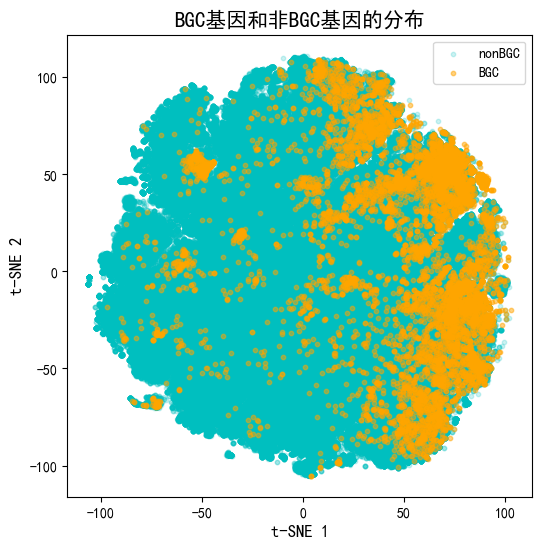

In [42]:
BGC_c = "orange"
nonBGC_c = "c"
plt.figure(figsize=(6, 6))
plt.scatter(nonBGC_gene[:, 0], nonBGC_gene[:, 1], c=nonBGC_c, label='nonBGC', s=10 , alpha=0.2)
plt.scatter(BGC_gene[:, 0], BGC_gene[:, 1], c=BGC_c, label='BGC', s=10, alpha=0.5)
plt.legend(fontsize=10)
plt.xlabel('t-SNE 1', fontsize=12)
plt.ylabel('t-SNE 2', fontsize=12)
plt.title('BGC基因和非BGC基因的分布', fontsize=15)
plt.savefig('./BGC_plot.jpg', dpi=600)
plt.show()
# 调整子图之间的间距
#plt.tight_layout()
# plt.savefig('./', dpi=600)



In [36]:
import json
def reduce_dimensions_vec(vectors):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(vectors)
    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    return vectors

In [37]:
with open('J:/helios/min3size200iter10neg20alpha-3/bgc_label_dic.json', 'r')as f:
    bgc_label_dic = json.load(f)

for i in bgc_label_dic:
    tmp = np.empty((0, 200), float)
    for j in bgc_label_dic[i]:
        arr = np.empty((0, 200), float)
        for k in j:
            # 使用np.append()向数组尾部添加一行
            try:
                new_row = model.wv[k]
            except:
                continue
            arr = np.concatenate((arr, [new_row]))
            # 计算列方向的平均值
        if len(arr)==0:
            continue
        col_mean = np.mean(arr, axis=0)
        tmp = np.concatenate((tmp, [col_mean]))
    bgc_label_dic[i] = reduce_dimensions_vec(tmp)

# 生成8种样本的数据
data = []
for key, value in bgc_label_dic.items():
    x = value[:, 0]
    y = value[:, 1]
    data.append({'x': x, 'y': y, 'label': key})

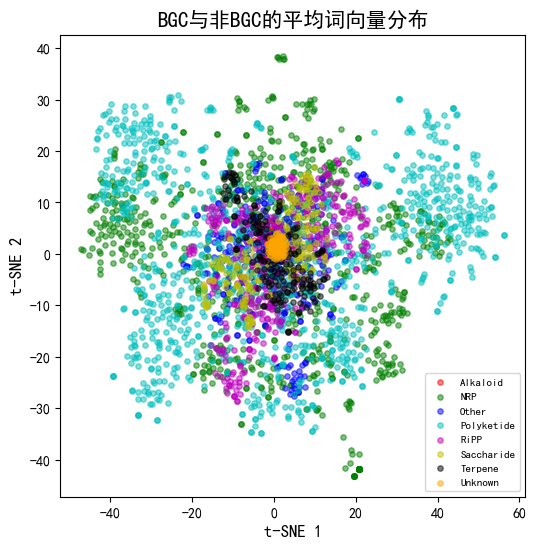

In [44]:
plt.figure(figsize=(6, 6))
# 定义颜色映射
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange']
# 绘制散点图，并指定颜色映射
for i, d in enumerate(data):
    plt.scatter(d['x'], d['y'], c=colors[i], label=d['label'], s=15 ,alpha=0.5)
# 添加图例
plt.legend(fontsize=8)
plt.xlabel('t-SNE 1', fontsize=12)
plt.ylabel('t-SNE 2', fontsize=12)
plt.title('BGC与非BGC的平均词向量分布', fontsize=15)


# plt.savefig(file_path, dpi=600)
# end_time = datetime.datetime.now()
# print('总时间：', (end_time-start_time))
# plt.close()
plt.savefig('./BGC_distribution.png', dpi=600,format='png')
plt.show()
